In [72]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('int_online_tx.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [3]:
data.shape


(35116, 8)

<Axes: xlabel='count', ylabel='Country'>

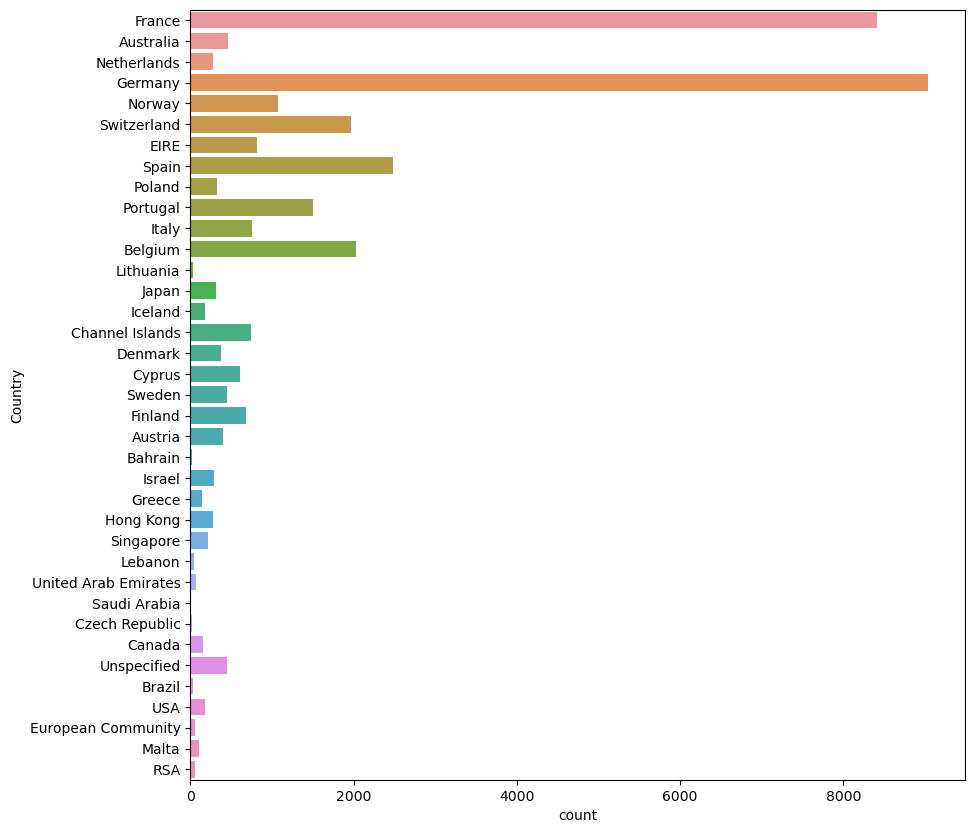

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(y='Country', data = data)

In [5]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [6]:
data = data.dropna()
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
type(data['CustomerID'][0])
data['CustomerID'] = data['CustomerID'].astype(int)
type(data['CustomerID'][0])

numpy.int32

In [8]:
data['Sales'] = data.Quantity * data.UnitPrice
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.00
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.00
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.00
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.20
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.60
...,...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680,France,10.20
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680,France,12.60
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680,France,16.60
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680,France,16.60


In [9]:
data.to_csv('cleaned.csv', index=None)

In [10]:
invoice_data = data.groupby(by=['CustomerID']).agg(total_transactions=('InvoiceNo', 'nunique'))
invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [11]:
product_data = data.groupby(by=['CustomerID']).agg(total_products =('StockCode', 'count') , total_unique_products =('StockCode', 'nunique'))
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [12]:
a = data.groupby(by=['CustomerID'])
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6
...,...,...,...,...,...,...,...,...,...
35063,581578,POST,POSTAGE,3,12/9/11 12:16,18.00,12713,Germany,54.0
35064,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,12/9/11 12:16,1.25,12713,Germany,30.0
35065,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,12/9/11 12:16,1.25,12713,Germany,30.0
35066,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,12/9/11 12:16,1.25,12713,Germany,30.0


In [13]:
sales_data = a.agg(total_sales = ('Sales', 'sum'), avg_product_value=('Sales', 'mean'))
sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [14]:
b = data.groupby(by=['CustomerID', 'InvoiceNo'])
b.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6
...,...,...,...,...,...,...,...,...,...
35101,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/11 12:50,1.95,12680,France,23.4
35102,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/9/11 12:50,1.65,12680,France,19.8
35103,581587,22555,PLASTERS IN TIN STRONGMAN,12,12/9/11 12:50,1.65,12680,France,19.8
35104,581587,22728,ALARM CLOCK BAKELIKE PINK,4,12/9/11 12:50,3.75,12680,France,15.0


In [15]:
cart_data = b.agg(cart_value=('Sales', 'sum'))
cart_data

cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
...                          ...
17828      557668          30.00
           563936         213.50
           576897         743.43
17829      543911         889.24
17844      564428          51.56

[1536 rows x 1 columns]

In [16]:
cart_data.reset_index(inplace=True)
cart_data.head(20)

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
5,12347,573511,1294.32
6,12347,581180,224.82
7,12348,539318,892.80
8,12348,541998,227.44
9,12348,548955,367.00


In [17]:
agg_cart_data = cart_data.groupby('CustomerID').agg(mean_cart_value = ('cart_value', 'mean') , max_cart_value = ('cart_value', 'max'),
                                                   min_cart_value = ('cart_value', 'min'))
agg_cart_data.head(20)

,mean_cart_value,max_cart_value,min_cart_value
CustomerID,,,
12347,615.714286,1294.32,224.82
12348,449.310000,892.80,227.44
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,840.30,120.33
12353,89.000000,89.00,89.00
12354,1079.400000,1079.40,1079.40
12355,459.400000,459.40,459.40
12356,937.143333,2271.62,58.35


In [18]:
customer_df = invoice_data.join([sales_data, agg_cart_data, product_data])
customer_df.head()

,total_transactions,total_sales,avg_product_value,mean_cart_value,max_cart_value,min_cart_value,total_products,total_unique_products
CustomerID,,,,,,,,
12347,7,4310.00,23.681319,615.714286,1294.32,224.82,182,103
12348,4,1797.24,57.975484,449.310000,892.80,227.44,31,22
12349,1,1757.55,24.076027,1757.550000,1757.55,1757.55,73,73
12350,1,334.40,19.670588,334.400000,334.40,334.40,17,17
12352,8,2506.04,29.482824,313.255000,840.30,120.33,85,59


In [19]:
customer_df.to_csv('analytical_base_table.csv')

In [20]:
df = pd.read_csv('cleaned.csv')

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [25]:
item_dummies = pd.get_dummies(df.StockCode)
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
item_dummies['CustomerID'] =df.CustomerID
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12583


In [27]:
item_data = item_dummies.groupby(by=['CustomerID']).sum()
item_data

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,0,0,0,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17508,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [29]:
pd.set_option('display.max_columns', 100)
item_data.sum()

10002       12
10120        1
10125       13
10133        5
10135        4
          ... 
90202D       1
90204        1
C2           6
M           34
POST      1055
Length: 2574, dtype: int64

In [30]:
item_data.to_csv('item_data.csv')

In [31]:
item_data.sum().sort_values().tail(120)

22748        50
22847        50
15056BL      50
23159        50
85014B       50
           ... 
22556       179
22554       197
22423       222
22326       271
POST       1055
Length: 120, dtype: int64

In [34]:
most_120_items = item_data.sum().sort_values().tail(120).index
most_120_items

Index(['22748', '22847', '15056BL', '23159', '85014B', '23243', '23231',
       '22898', '23388', '23255',
       ...
       '21212', '22551', '22629', '22328', '21731', '22556', '22554', '22423',
       '22326', 'POST'],
      dtype='object', length=120)

In [35]:
top_120_item_data = item_data[most_120_items]
top_120_item_data.head()

,22748,22847,15056BL,23159,85014B,23243,23231,22898,23388,23255,22966,22558,21558,22356,84997C,23292,22699,22331,22385,23480,84375,21156,21242,22417,21122,84997B,22895,22962,22557,22907,23307,20676,21977,21976,23293,22661,23290,22627,84879,20682,22367,23236,22355,22197,22553,20685,23108,22384,21936,20728,...,22631,22090,23199,21915,23203,84997D,22029,23209,23254,22077,22960,23256,22492,22467,22726,22382,23240,23245,21094,21086,23206,22352,22727,22138,22720,21559,22728,22555,20724,20712,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [37]:
top_120_item_data.to_csv('threshold_item_data.csv')

In [39]:
item_data = pd.read_csv('item_data.csv', index_col=0)
item_data

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,0,0,0,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17508,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17828,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [40]:
item_data.shape

(414, 2574)

In [47]:
scalar = StandardScaler()
item_data_Scaled = scalar.fit_transform(item_data)
item_data_Scaled

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       ...,
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.12065146],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072]])

In [50]:
pca = PCA()
pca.fit(item_data_Scaled)

PCA()

In [54]:
PC_items = pca.transform(item_data_Scaled)
PC_items.shape

(414, 414)

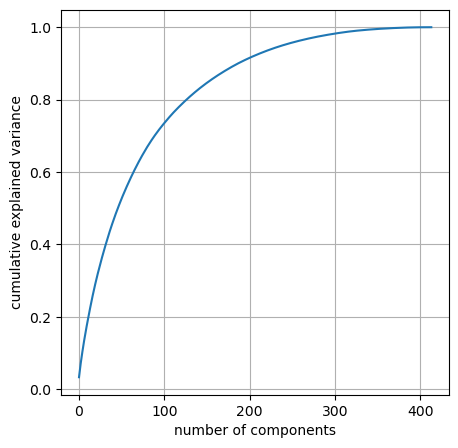

In [62]:
cumulative_explained_variace = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(5,5))
plt.plot(range(len(cumulative_explained_variace)), cumulative_explained_variace)
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [66]:
cumulative_explained_variace[300]

0.9824241831916601

In [68]:
pca = PCA(n_components=300)
PCA_items = pca.fit_transform(item_data_Scaled)
PCA_items.shape

(414, 300)

In [80]:
items_pca = pd.DataFrame(PCA_items)
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PCA_items.shape[1])]
items_pca.index = item_data.index
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828917,-0.495545,3.093849,-0.633706,-11.534092,2.161996,7.116957,5.336009,4.424414,4.637002,2.316503,12.310783,1.986696,-11.431269,5.617791,-2.177268,7.665832,-12.135817,-16.049000,-5.949238,7.814288,40.518194,-35.575039,-17.557418,6.869259,20.886868,2.296657,-26.160394,-32.580135,7.880285,12.358371,6.826718,-32.957865,-4.405057,-17.238628,-11.272274,-14.487767,-2.766330,4.736717,-6.985884,-1.464059,10.603071,1.239909,3.086324,5.336237,-0.410776,1.616712,-6.383660,3.065176,...,0.051268,-0.422080,-0.219805,-0.001733,0.174849,-0.247115,-0.206999,0.152749,-0.167019,0.159057,0.162762,-0.121372,-0.099940,-0.199447,-0.113797,0.130426,0.046740,0.019207,0.204162,-0.260590,-0.165295,-0.015515,0.091048,-0.065425,0.011816,0.004000,0.058757,0.012090,0.008600,-0.027199,0.102333,-0.028974,-0.088246,-0.209639,-0.085919,0.034498,-0.098961,0.097630,-0.073011,-0.026877,-0.016942,-0.042423,-0.081034,-0.001045,0.048318,0.001489,0.089897,-0.173733,0.028548,-0.030398
12348,-4.219837,1.226217,-1.881912,-0.174340,0.817996,1.160834,-0.871683,-0.846634,0.460240,0.854274,-0.401793,0.981803,-1.104237,0.770191,-0.092975,-0.313393,-0.448633,1.207301,0.381678,-0.469152,0.185789,0.054585,0.499987,0.373514,1.226615,-0.773073,-0.270125,0.850016,-0.370482,-0.573939,1.012802,-0.580828,0.949802,-0.733970,0.353890,-0.387479,-0.298542,0.396418,0.154925,0.333479,-0.466262,0.703453,1.200580,-0.202164,-0.871793,-0.055069,-0.421731,-1.623012,-0.397689,0.452589,...,0.230354,0.990896,-0.219257,-1.059854,0.745854,1.083648,-0.471292,0.498550,0.772748,0.550166,1.313602,-1.203435,1.059302,-0.632616,0.155484,1.299697,-0.008170,0.560508,-0.322723,0.354114,0.675306,-0.073892,-0.670839,0.175710,-1.313051,0.795966,-0.465558,0.588171,0.258725,0.072335,-0.713511,-0.215792,0.198863,0.151845,0.049964,0.316420,0.458754,0.386198,0.738378,-0.364547,-0.334659,-0.614331,0.403980,0.119635,-0.087638,0.383785,0.984472,-1.491751,0.847345,0.645890
12349,-1.260847,2.387664,-0.073148,-1.119161,-0.034339,-3.715390,-0.343602,-0.149045,-0.790001,-0.379234,1.570090,0.183310,0.223639,-0.051066,3.179090,-0.512679,-1.839577,0.383216,0.317492,-0.003006,-0.420161,0.456436,-0.789675,1.751367,-1.481236,0.757191,-0.912292,0.771948,0.503370,-1.345637,0.286381,0.668565,0.085126,-0.216750,-0.667408,-1.535679,0.783800,-1.418824,-0.098817,-0.929870,0.090829,-0.095242,-0.163214,0.700639,1.381550,-0.243734,-0.105134,-0.176474,0.862920,1.685212,...,-0.578229,0.151792,-0.147754,-0.408142,0.900984,-0.365579,0.679867,-0.107142,1.101329,0.474739,0.116815,-0.238475,0.425795,0.295631,-0.005489,-0.560151,-0.336369,0.770824,0.296533,0.184706,0.073401,-0.230526,-0.032072,0.123191,0.120919,0.028670,-0.204313,0.092909,0.329273,0.566350,-0.076025,0.127139,-0.299746,-0.611058,0.082621,-0.278016,-0.209445,-0.096705,-0.098669,0.418440,0.123595,0.621342,-0.045250,0.202625,0.167862,0.156285,0.250211,0.549240,-0.119898,-0.323574
12350,-4.929320,-0.714859,-1.580930,-0.469767,-0.116290,0.647835,0.112904,-1.336313,1.547069,-1.190409,-0.213170,1.057289,-0.475002,0.856574,-1.305371,0.242700,0.268312,1.952558,-0.227722,0.569825,-0.186512,0.903529,1.364748,0.178124,-0.260398,-0.168825,-0.681952,1.081305,-0.155239,-0.397163,0.240051,0.634068,-1.447080,-0.186097,-0.315379,-0.306429,-1.359020,-0.001474,0.579057,-0.248312,0.588131,-0.217987,0.284603,0.525266,-0.531670,-0.101392,-1.

In [81]:
items_pca.to_csv('item_pca_data.csv')

In [82]:
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)
pca_item_data = pd.read_csv('item_pca_data.csv', index_col=0)

In [83]:
base_df.head()

,total_transactions,total_sales,avg_product_value,mean_cart_value,max_cart_value,min_cart_value,total_products,total_unique_products
CustomerID,,,,,,,,
12347,7,4310.00,23.681319,615.714286,1294.32,224.82,182,103
12348,4,1797.24,57.975484,449.310000,892.80,227.44,31,22
12349,1,1757.55,24.076027,1757.550000,1757.55,1757.55,73,73
12350,1,334.40,19.670588,334.400000,334.40,334.40,17,17
12352,8,2506.04,29.482824,313.255000,840.30,120.33,85,59


In [84]:
threshold_item_data.head()

,22748,22847,15056BL,23159,85014B,23243,23231,22898,23388,23255,22966,22558,21558,22356,84997C,23292,22699,22331,22385,23480,84375,21156,21242,22417,21122,84997B,22895,22962,22557,22907,23307,20676,21977,21976,23293,22661,23290,22627,84879,20682,22367,23236,22355,22197,22553,20685,23108,22384,21936,20728,...,22631,22090,23199,21915,23203,84997D,22029,23209,23254,22077,22960,23256,22492,22467,22726,22382,23240,23245,21094,21086,23206,22352,22727,22138,22720,21559,22728,22555,20724,20712,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [85]:
pca_item_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828917,-0.495545,3.093849,-0.633706,-11.534092,2.161996,7.116957,5.336009,4.424414,4.637002,2.316503,12.310783,1.986696,-11.431269,5.617791,-2.177268,7.665832,-12.135817,-16.049000,-5.949238,7.814288,40.518194,-35.575039,-17.557418,6.869259,20.886868,2.296657,-26.160394,-32.580135,7.880285,12.358371,6.826718,-32.957865,-4.405057,-17.238628,-11.272274,-14.487767,-2.766330,4.736717,-6.985884,-1.464059,10.603071,1.239909,3.086324,5.336237,-0.410776,1.616712,-6.383660,3.065176,...,0.051268,-0.422080,-0.219805,-0.001733,0.174849,-0.247115,-0.206999,0.152749,-0.167019,0.159057,0.162762,-0.121372,-0.099940,-0.199447,-0.113797,0.130426,0.046740,0.019207,0.204162,-0.260590,-0.165295,-0.015515,0.091048,-0.065425,0.011816,0.004000,0.058757,0.012090,0.008600,-0.027199,0.102333,-0.028974,-0.088246,-0.209639,-0.085919,0.034498,-0.098961,0.097630,-0.073011,-0.026877,-0.016942,-0.042423,-0.081034,-0.001045,0.048318,0.001489,0.089897,-0.173733,0.028548,-0.030398
12348,-4.219837,1.226217,-1.881912,-0.174340,0.817996,1.160834,-0.871683,-0.846634,0.460240,0.854274,-0.401793,0.981803,-1.104237,0.770191,-0.092975,-0.313393,-0.448633,1.207301,0.381678,-0.469152,0.185789,0.054585,0.499987,0.373514,1.226615,-0.773073,-0.270125,0.850016,-0.370482,-0.573939,1.012802,-0.580828,0.949802,-0.733970,0.353890,-0.387479,-0.298542,0.396418,0.154925,0.333479,-0.466262,0.703453,1.200580,-0.202164,-0.871793,-0.055069,-0.421731,-1.623012,-0.397689,0.452589,...,0.230354,0.990896,-0.219257,-1.059854,0.745854,1.083648,-0.471292,0.498550,0.772748,0.550166,1.313602,-1.203435,1.059302,-0.632616,0.155484,1.299697,-0.008170,0.560508,-0.322723,0.354114,0.675306,-0.073892,-0.670839,0.175710,-1.313051,0.795966,-0.465558,0.588171,0.258725,0.072335,-0.713511,-0.215792,0.198863,0.151845,0.049964,0.316420,0.458754,0.386198,0.738378,-0.364547,-0.334659,-0.614331,0.403980,0.119635,-0.087638,0.383785,0.984472,-1.491751,0.847345,0.645890
12349,-1.260847,2.387664,-0.073148,-1.119161,-0.034339,-3.715390,-0.343602,-0.149045,-0.790001,-0.379234,1.570090,0.183310,0.223639,-0.051066,3.179090,-0.512679,-1.839577,0.383216,0.317492,-0.003006,-0.420161,0.456436,-0.789675,1.751367,-1.481236,0.757191,-0.912292,0.771948,0.503370,-1.345637,0.286381,0.668565,0.085126,-0.216750,-0.667408,-1.535679,0.783800,-1.418824,-0.098817,-0.929870,0.090829,-0.095242,-0.163214,0.700639,1.381550,-0.243734,-0.105134,-0.176474,0.862920,1.685212,...,-0.578229,0.151792,-0.147754,-0.408142,0.900984,-0.365579,0.679867,-0.107142,1.101329,0.474739,0.116815,-0.238475,0.425795,0.295631,-0.005489,-0.560151,-0.336369,0.770824,0.296533,0.184706,0.073401,-0.230526,-0.032072,0.123191,0.120919,0.028670,-0.204313,0.092909,0.329273,0.566350,-0.076025,0.127139,-0.299746,-0.611058,0.082621,-0.278016,-0.209445,-0.096705,-0.098669,0.418440,0.123595,0.621342,-0.045250,0.202625,0.167862,0.156285,0.250211,0.549240,-0.119898,-0.323574
12350,-4.929320,-0.714859,-1.580930,-0.469767,-0.116290,0.647835,0.112904,-1.336313,1.547069,-1.190409,-0.213170,1.057289,-0.475002,0.856574,-1.305371,0.242700,0.268312,1.952558,-0.227722,0.569825,-0.186512,0.903529,1.364748,0.178124,-0.260398,-0.168825,-0.681952,1.081305,-0.155239,-0.397163,0.240051,0.634068,-1.447080,-0.186097,-0.315379,-0.306429,-1.359020,-0.001474,0.579057,-0.248312,0.588131,-0.217987,0.284603,0.525266,-0.531670,-0.101392,-1.

In [86]:
print( base_df.shape )
print( threshold_item_data.shape )
print( pca_item_data.shape )

(414, 8)
(414, 120)
(414, 300)


In [91]:
threshold_df = base_df.join(threshold_item_data)
threshold_df.head()

,total_transactions,total_sales,avg_product_value,mean_cart_value,max_cart_value,min_cart_value,total_products,total_unique_products,22748,22847,15056BL,23159,85014B,23243,23231,22898,23388,23255,22966,22558,21558,22356,84997C,23292,22699,22331,22385,23480,84375,21156,21242,22417,21122,84997B,22895,22962,22557,22907,23307,20676,21977,21976,23293,22661,23290,22627,84879,20682,22367,23236,...,22631,22090,23199,21915,23203,84997D,22029,23209,23254,22077,22960,23256,22492,22467,22726,22382,23240,23245,21094,21086,23206,22352,22727,22138,22720,21559,22728,22555,20724,20712,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,4310.00,23.681319,615.714286,1294.32,224.82,182,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,4,1797.24,57.975484,449.310000,892.80,227.44,31,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,1,1757.55,24.076027,1757.550000,1757.55,1757.55,73,73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,1,334.40,19.670588,334.400000,334.40,334.40,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,8,2506.04,29.482824,313.255000,840.30,120.33,85,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [90]:
pca_df = base_df.join(pca_item_data)
pca_df.head()

,total_transactions,total_sales,avg_product_value,mean_cart_value,max_cart_value,min_cart_value,total_products,total_unique_products,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,4310.00,23.681319,615.714286,1294.32,224.82,182,103,5.876141,4.828917,-0.495545,3.093849,-0.633706,-11.534092,2.161996,7.116957,5.336009,4.424414,4.637002,2.316503,12.310783,1.986696,-11.431269,5.617791,-2.177268,7.665832,-12.135817,-16.049000,-5.949238,7.814288,40.518194,-35.575039,-17.557418,6.869259,20.886868,2.296657,-26.160394,-32.580135,7.880285,12.358371,6.826718,-32.957865,-4.405057,-17.238628,-11.272274,-14.487767,-2.766330,4.736717,-6.985884,-1.464059,...,0.051268,-0.422080,-0.219805,-0.001733,0.174849,-0.247115,-0.206999,0.152749,-0.167019,0.159057,0.162762,-0.121372,-0.099940,-0.199447,-0.113797,0.130426,0.046740,0.019207,0.204162,-0.260590,-0.165295,-0.015515,0.091048,-0.065425,0.011816,0.004000,0.058757,0.012090,0.008600,-0.027199,0.102333,-0.028974,-0.088246,-0.209639,-0.085919,0.034498,-0.098961,0.097630,-0.073011,-0.026877,-0.016942,-0.042423,-0.081034,-0.001045,0.048318,0.001489,0.089897,-0.173733,0.028548,-0.030398
12348,4,1797.24,57.975484,449.310000,892.80,227.44,31,22,-4.219837,1.226217,-1.881912,-0.174340,0.817996,1.160834,-0.871683,-0.846634,0.460240,0.854274,-0.401793,0.981803,-1.104237,0.770191,-0.092975,-0.313393,-0.448633,1.207301,0.381678,-0.469152,0.185789,0.054585,0.499987,0.373514,1.226615,-0.773073,-0.270125,0.850016,-0.370482,-0.573939,1.012802,-0.580828,0.949802,-0.733970,0.353890,-0.387479,-0.298542,0.396418,0.154925,0.333479,-0.466262,0.703453,...,0.230354,0.990896,-0.219257,-1.059854,0.745854,1.083648,-0.471292,0.498550,0.772748,0.550166,1.313602,-1.203435,1.059302,-0.632616,0.155484,1.299697,-0.008170,0.560508,-0.322723,0.354114,0.675306,-0.073892,-0.670839,0.175710,-1.313051,0.795966,-0.465558,0.588171,0.258725,0.072335,-0.713511,-0.215792,0.198863,0.151845,0.049964,0.316420,0.458754,0.386198,0.738378,-0.364547,-0.334659,-0.614331,0.403980,0.119635,-0.087638,0.383785,0.984472,-1.491751,0.847345,0.645890
12349,1,1757.55,24.076027,1757.550000,1757.55,1757.55,73,73,-1.260847,2.387664,-0.073148,-1.119161,-0.034339,-3.715390,-0.343602,-0.149045,-0.790001,-0.379234,1.570090,0.183310,0.223639,-0.051066,3.179090,-0.512679,-1.839577,0.383216,0.317492,-0.003006,-0.420161,0.456436,-0.789675,1.751367,-1.481236,0.757191,-0.912292,0.771948,0.503370,-1.345637,0.286381,0.668565,0.085126,-0.216750,-0.667408,-1.535679,0.783800,-1.418824,-0.098817,-0.929870,0.090829,-0.095242,...,-0.578229,0.151792,-0.147754,-0.408142,0.900984,-0.365579,0.679867,-0.107142,1.101329,0.474739,0.116815,-0.238475,0.425795,0.295631,-0.005489,-0.560151,-0.336369,0.770824,0.296533,0.184706,0.073401,-0.230526,-0.032072,0.123191,0.120919,0.028670,-0.204313,0.092909,0.329273,0.566350,-0.076025,0.127139,-0.299746,-0.611058,0.082621,-0.278016,-0.209445,-0.096705,-0.098669,0.418440,0.123595,0.621342,-0.045250,0.202625,0.167862,0.156285,0.250211,0.549240,-0.119898,-0.323574
12350,1,334.40,19.670588,334.400000,334.40,334.40,17,17,-4.929320,-0.714859,-1.580930,-0.469767,-0.116290,0.647835,0.112904,-1.336313,1.547069,-1.190409,-0.213170,1.057289,-0.475002,0.856574,-1.305371,0.242700,0.268312,1.952558,-0.227722,0.569825,-0.186512,0.903529,1.364748,0.178124,-0.260398,-0.168825,-0.681952,1.081305,-0.155239,-0.397163,0.240051,0.634068,-1.447080,-0.186097,-0.315379,-0.306429,-1.359020,-0.001474,0.57905

In [92]:
threshold_scalar = StandardScaler()
pca_scalar = StandardScaler()

In [94]:
threshold_df_scaled = threshold_scalar.fit_transform(threshold_df)
threshold_df_scaled

array([[ 0.77401408,  0.58911537, -0.15831543, ...,  2.85598445,
        -0.45694114, -0.68068072],
       [ 0.06819507, -0.13388032,  0.29224814, ..., -0.44213985,
        -0.45694114,  0.38776219],
       [-0.63762393, -0.14530031, -0.15312966, ...,  0.38239122,
         0.24111654, -0.41356999],
       ...,
       [ 0.06819507, -0.12730569, -0.11253926, ..., -0.44213985,
        -0.45694114,  0.12065146],
       [-0.63762393, -0.39513889, -0.08001157, ..., -0.44213985,
        -0.45694114, -0.68068072],
       [-0.63762393, -0.63616431, -0.3339642 , ..., -0.44213985,
        -0.45694114, -0.68068072]])

In [97]:
pca_df_scaled = pca_scalar.fit_transform(pca_df)
pca_df_scaled

array([[ 0.77401408,  0.58911537, -0.15831543, ..., -0.17700373,
         0.02932045, -0.03136072],
       [ 0.06819507, -0.13388032,  0.29224814, ..., -1.51983497,
         0.87028394,  0.66635556],
       [-0.63762393, -0.14530031, -0.15312966, ...,  0.55957963,
        -0.12314373, -0.33382679],
       ...,
       [ 0.06819507, -0.12730569, -0.11253926, ..., -0.08666135,
         0.06638569, -0.12033263],
       [-0.63762393, -0.39513889, -0.08001157, ...,  0.12096535,
         0.17555461, -0.05192288],
       [-0.63762393, -0.63616431, -0.3339642 , ..., -0.02693051,
         0.15963123, -0.24001055]])

In [104]:
threshold_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

In [105]:
threshold_kmeans.fit(threshold_df_scaled)
threshold_df['cluster'] = threshold_kmeans.fit_predict(threshold_df_scaled)

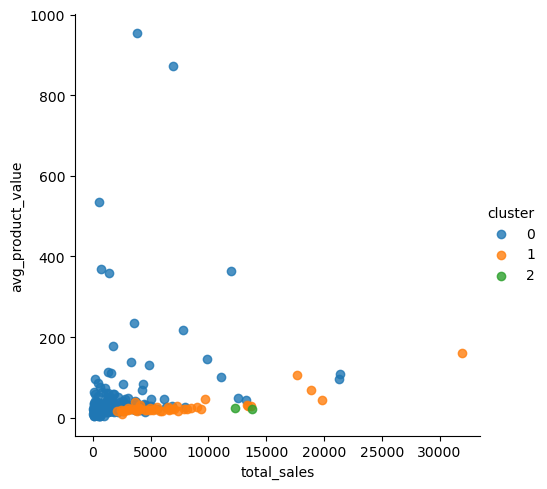

In [106]:
sns.lmplot(x="total_sales", y="avg_product_value", hue="cluster", data = threshold_df, fit_reg=False)

In [113]:
pca_kmeans = KMeans(n_clusters=3,init="k-means++", random_state=123)

In [114]:
pca_kmeans.fit(pca_df_scaled)
pca_df["cluster"] = pca_kmeans.fit_predict(pca_df_scaled)

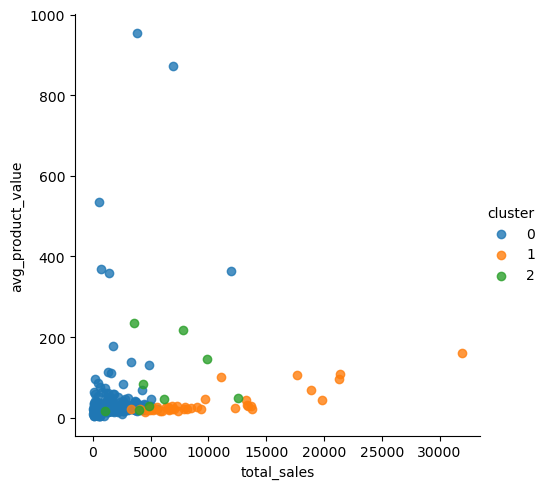

In [115]:
sns.lmplot(x="total_sales", y="avg_product_value", hue="cluster",data = pca_df,  fit_reg=False)

In [116]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(pca_df.cluster, threshold_df.cluster)

0.5476741073957975

In [117]:
pca_df.head()

,total_transactions,total_sales,avg_product_value,mean_cart_value,max_cart_value,min_cart_value,total_products,total_unique_products,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,4310.00,23.681319,615.714286,1294.32,224.82,182,103,5.876141,4.828917,-0.495545,3.093849,-0.633706,-11.534092,2.161996,7.116957,5.336009,4.424414,4.637002,2.316503,12.310783,1.986696,-11.431269,5.617791,-2.177268,7.665832,-12.135817,-16.049000,-5.949238,7.814288,40.518194,-35.575039,-17.557418,6.869259,20.886868,2.296657,-26.160394,-32.580135,7.880285,12.358371,6.826718,-32.957865,-4.405057,-17.238628,-11.272274,-14.487767,-2.766330,4.736717,-6.985884,-1.464059,...,-0.422080,-0.219805,-0.001733,0.174849,-0.247115,-0.206999,0.152749,-0.167019,0.159057,0.162762,-0.121372,-0.099940,-0.199447,-0.113797,0.130426,0.046740,0.019207,0.204162,-0.260590,-0.165295,-0.015515,0.091048,-0.065425,0.011816,0.004000,0.058757,0.012090,0.008600,-0.027199,0.102333,-0.028974,-0.088246,-0.209639,-0.085919,0.034498,-0.098961,0.097630,-0.073011,-0.026877,-0.016942,-0.042423,-0.081034,-0.001045,0.048318,0.001489,0.089897,-0.173733,0.028548,-0.030398,0
12348,4,1797.24,57.975484,449.310000,892.80,227.44,31,22,-4.219837,1.226217,-1.881912,-0.174340,0.817996,1.160834,-0.871683,-0.846634,0.460240,0.854274,-0.401793,0.981803,-1.104237,0.770191,-0.092975,-0.313393,-0.448633,1.207301,0.381678,-0.469152,0.185789,0.054585,0.499987,0.373514,1.226615,-0.773073,-0.270125,0.850016,-0.370482,-0.573939,1.012802,-0.580828,0.949802,-0.733970,0.353890,-0.387479,-0.298542,0.396418,0.154925,0.333479,-0.466262,0.703453,...,0.990896,-0.219257,-1.059854,0.745854,1.083648,-0.471292,0.498550,0.772748,0.550166,1.313602,-1.203435,1.059302,-0.632616,0.155484,1.299697,-0.008170,0.560508,-0.322723,0.354114,0.675306,-0.073892,-0.670839,0.175710,-1.313051,0.795966,-0.465558,0.588171,0.258725,0.072335,-0.713511,-0.215792,0.198863,0.151845,0.049964,0.316420,0.458754,0.386198,0.738378,-0.364547,-0.334659,-0.614331,0.403980,0.119635,-0.087638,0.383785,0.984472,-1.491751,0.847345,0.645890,0
12349,1,1757.55,24.076027,1757.550000,1757.55,1757.55,73,73,-1.260847,2.387664,-0.073148,-1.119161,-0.034339,-3.715390,-0.343602,-0.149045,-0.790001,-0.379234,1.570090,0.183310,0.223639,-0.051066,3.179090,-0.512679,-1.839577,0.383216,0.317492,-0.003006,-0.420161,0.456436,-0.789675,1.751367,-1.481236,0.757191,-0.912292,0.771948,0.503370,-1.345637,0.286381,0.668565,0.085126,-0.216750,-0.667408,-1.535679,0.783800,-1.418824,-0.098817,-0.929870,0.090829,-0.095242,...,0.151792,-0.147754,-0.408142,0.900984,-0.365579,0.679867,-0.107142,1.101329,0.474739,0.116815,-0.238475,0.425795,0.295631,-0.005489,-0.560151,-0.336369,0.770824,0.296533,0.184706,0.073401,-0.230526,-0.032072,0.123191,0.120919,0.028670,-0.204313,0.092909,0.329273,0.566350,-0.076025,0.127139,-0.299746,-0.611058,0.082621,-0.278016,-0.209445,-0.096705,-0.098669,0.418440,0.123595,0.621342,-0.045250,0.202625,0.167862,0.156285,0.250211,0.549240,-0.119898,-0.323574,0
12350,1,334.40,19.670588,334.400000,334.40,334.40,17,17,-4.929320,-0.714859,-1.580930,-0.469767,-0.116290,0.647835,0.112904,-1.336313,1.547069,-1.190409,-0.213170,1.057289,-0.475002,0.856574,-1.305371,0.242700,0.268312,1.952558,-0.227722,0.569825,-0.186512,0.903529,1.364748,0.178124,-0.260398,-0.168825,-0.681952,1.081305,-0.155239,-0.397163,0.240051,0.634068,-1.447080,-0.186097,-0.315379,-0.306429,-1.359020,-0.001474,0.579057,-0.248312,0.588131

In [118]:
threshold_df.head()

,total_transactions,total_sales,avg_product_value,mean_cart_value,max_cart_value,min_cart_value,total_products,total_unique_products,22748,22847,15056BL,23159,85014B,23243,23231,22898,23388,23255,22966,22558,21558,22356,84997C,23292,22699,22331,22385,23480,84375,21156,21242,22417,21122,84997B,22895,22962,22557,22907,23307,20676,21977,21976,23293,22661,23290,22627,84879,20682,22367,23236,...,22090,23199,21915,23203,84997D,22029,23209,23254,22077,22960,23256,22492,22467,22726,22382,23240,23245,21094,21086,23206,22352,22727,22138,22720,21559,22728,22555,20724,20712,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,4310.00,23.681319,615.714286,1294.32,224.82,182,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0,0
12348,4,1797.24,57.975484,449.310000,892.80,227.44,31,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
12349,1,1757.55,24.076027,1757.550000,1757.55,1757.55,73,73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
12350,1,334.40,19.670588,334.400000,334.40,334.40,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
12352,8,2506.04,29.482824,313.255000,840.30,120.33,85,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5,0
